In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns= 'Id', inplace = True)

In [5]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualization

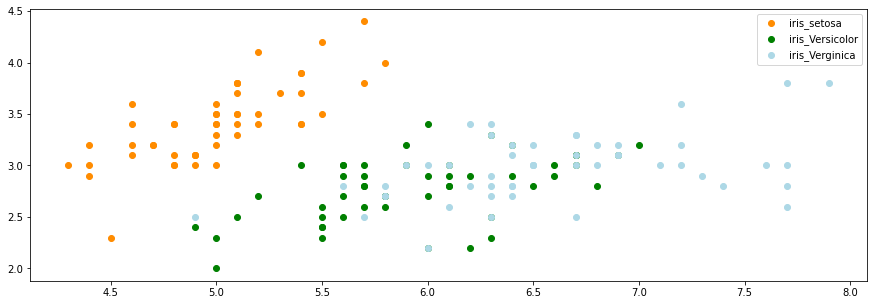

In [7]:

iris_setosa = data[data[list(data.columns)[-1]] == "Iris-setosa"]
iris_versicolor = data[data[list(data.columns)[-1]] == "Iris-versicolor"]
iris_virginica = data[data[list(data.columns)[-1]] == "Iris-virginica"]

fig, axes = plt.subplots(1,1, figsize=(15,5))
axes.scatter(iris_setosa[["SepalLengthCm"]], iris_setosa[["SepalWidthCm"]], c="darkorange", label="iris_setosa")
axes.scatter(iris_versicolor[["SepalLengthCm"]], iris_versicolor[["SepalWidthCm"]], c="green", label="iris_Versicolor")
axes.scatter(iris_virginica[["SepalLengthCm"]], iris_virginica[["SepalWidthCm"]], c="lightblue", label="iris_Verginica")
axes.legend()
plt.show()

Labelling (converting string to number)

In [8]:
from sklearn.preprocessing import LabelEncoder
X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
X.value_counts()
Y.value_counts()
#Initialize Encoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY
# Scaling for X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalerX = scaler.fit_transform(X)
scalerX

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

KNN Classifier

In [9]:
# Splitting
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scalerX, encodedY, test_size= 0.28, random_state= 2)

from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors= 4)
knn_cls.fit(xtrain, ytrain)
yhat = knn_cls.predict(xtest)

from sklearn.metrics import f1_score, confusion_matrix
print('F1-score:',f1_score(yhat, ytest, average = None))
print('Confused matrix: ', confusion_matrix(yhat, ytest))
print(xtest[0,:])
#knn_cls.predict(xtest[0,:])
ytest[0] #to check if its setosa

F1-score: [1. 1. 1.]
Confused matrix:  [[16  0  0]
 [ 0 14  0]
 [ 0  0 13]]
[-1.50652052  0.80065426 -1.3412724  -1.18150376]


0

Gridserach Cross validation

In [10]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(
    knn,
    param_grid= {
    'n_neighbors': list(range(5,50,3))
    },
    cv = 7,
    scoring = 'accuracy'
)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 17}
0.9636904761904762
